In [294]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [295]:
students = pd.read_csv("Data/students1.csv")
students.head()

,Mã học sinh,Họ tên,Ngày sinh,Giới tính,Quê quán,Toán,Lý,Hóa,Sinh,Văn,Sử,Địa,Tiếng Anh
0,20205210,Nguyễn Đức Bình,3/10/2000,Nam,Hà Nội,7.0,8.0,8.8,6.8,4.0,5.4,5.6,8.5
1,20205211,Lê Minh Hoàng,2/11/2001,Nam,Quảng Bình,5.6,7.7,6.0,7.0,6.5,6.0,3.4,9.0
2,20205212,Trần Trang Nhung,7/5/2002,Nữ,Hà Nam,4.2,6.5,5.4,8.0,7.0,7.5,4.3,5.5
3,20205213,Nguyễn Thị Linh,12/17/2000,Nữ,Bắc Ninh,8.0,5.6,6.5,7.0,7.5,6.5,5.6,6.0
4,20205214,Đặng Ngọc Sơn,1/25/2000,Nam,Thái Bình,9.3,5.8,7.5,4.5,6.5,4.5,7.8,3.8


In [296]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Mã học sinh  21 non-null     int64  
 1   Họ tên       21 non-null     object 
 2   Ngày sinh    21 non-null     object 
 3   Giới tính    21 non-null     object 
 4   Quê quán     21 non-null     object 
 5   Toán         21 non-null     float64
 6   Lý           21 non-null     float64
 7   Hóa          21 non-null     float64
 8   Sinh         21 non-null     float64
 9   Văn          21 non-null     float64
 10  Sử           21 non-null     float64
 11  Địa          21 non-null     float64
 12  Tiếng Anh    21 non-null     float64
dtypes: float64(8), int64(1), object(4)
memory usage: 2.3+ KB


##### 1. Vẽ bđ thể hiện giới tính của số thí sinh tham gia kỳ thi

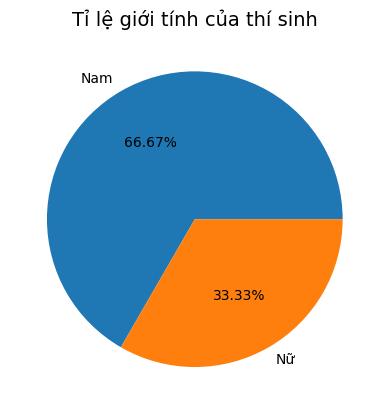

In [297]:
labels = students['Giới tính'].unique()
count = [students['Giới tính'][students['Giới tính'].str.contains('Nam')].count(),
        students['Giới tính'][students['Giới tính'].str.contains('Nữ')].count()]

plt.pie(count,labels=labels,autopct='%1.2f%%')
plt.title('Tỉ lệ giới tính của thí sinh',fontsize = 14)
plt.show()

In [298]:
ge = students.groupby('Giới tính')['Mã học sinh'].count()
ge

Giới tính
Nam    14
Nữ      7
Name: Mã học sinh, dtype: int64

##### 2. bđ thể hiện số thí sinh của từng tỉnh

In [299]:
dicts = {}

for province in students['Quê quán']:
    if province in dicts.keys():
        dicts[province] += 1
    else:
        dicts[province] = 1
        
print(dicts)

{'Hà Nội': 5, 'Quảng Bình': 2, 'Hà Nam': 1, 'Bắc Ninh': 3, 'Thái Bình': 2, 'Nam Định': 2, 'Tuyên Quang': 1, 'Thái Nguyên': 2, 'Hà Giang': 2, 'Quảng Ninh': 1}


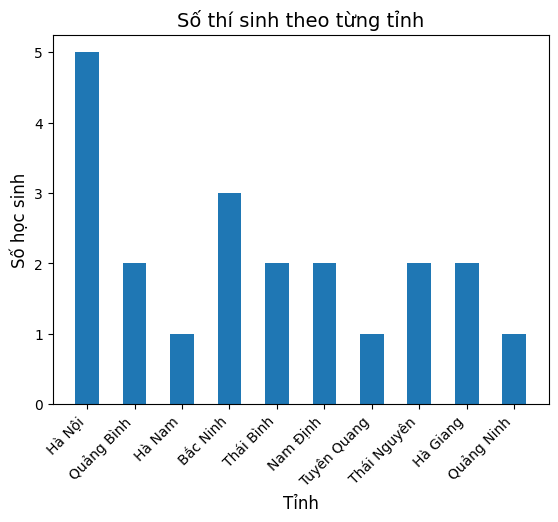

In [300]:
x = dicts.keys()
y=dicts.values()

plt.bar(x,y,width = 0.5)
plt.xticks(rotation=45, ha='right')
plt.title('Số thí sinh theo từng tỉnh',fontsize = 14)
plt.xlabel('Tỉnh',fontsize = 12)
plt.ylabel('Số học sinh',fontsize = 12)
plt.show()

##### 3.Vẽ bđ đtb từng môn

In [301]:
x = students.columns[5:]

dicts = {}

for mon in x:
    dicts[mon] = round(students[mon].mean(),2)
        
print(dicts)

{'Toán': 6.14, 'Lý': 6.13, 'Hóa': 6.54, 'Sinh': 5.77, 'Văn': 5.82, 'Sử': 6.3, 'Địa': 6.3, 'Tiếng Anh': 6.29}


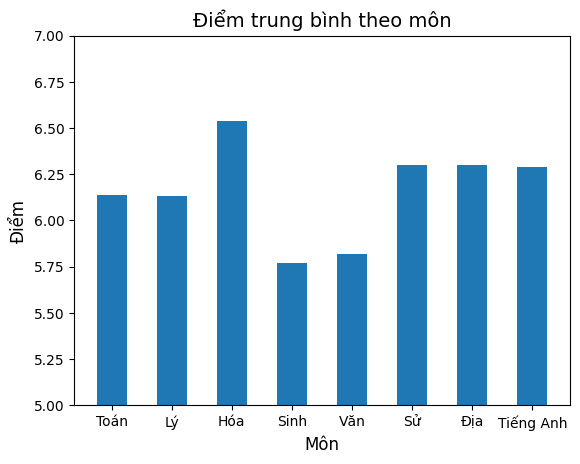

In [302]:
y=dicts.values()

plt.bar(x,y,width = 0.5)
plt.ylim(5,7)
plt.title('Điểm trung bình theo môn',fontsize = 14)
plt.xlabel('Môn',fontsize = 12)
plt.ylabel('Điểm',fontsize = 12)
plt.show()

##### 4.Vẽ bđ điểm cao nhất các môn

In [303]:
x = students.columns[5:]

dicts = {}

for mon in x:
    dicts[mon] = students[mon].max()
        
print(dicts)

{'Toán': 9.3, 'Lý': 9.0, 'Hóa': 9.4, 'Sinh': 9.0, 'Văn': 10.0, 'Sử': 10.0, 'Địa': 9.5, 'Tiếng Anh': 10.0}


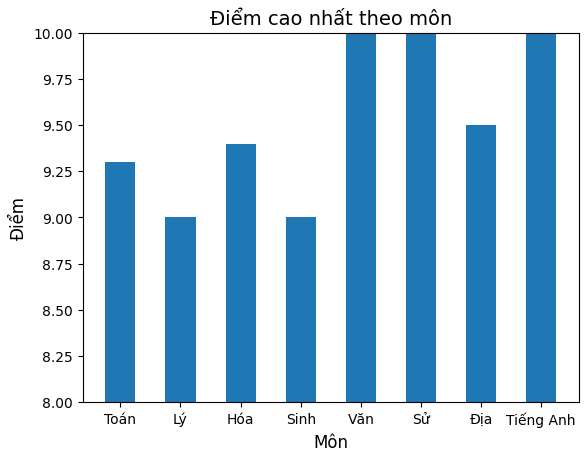

In [304]:
y=dicts.values()

plt.bar(x,y,width = 0.5)
plt.ylim(8,10)
plt.title('Điểm cao nhất theo môn',fontsize = 14)
plt.xlabel('Môn',fontsize = 12)
plt.ylabel('Điểm',fontsize = 12)
plt.show()

##### 5. Vẽ bđ so sánh số thí sinh đạt điểm cao nhất các môn

In [305]:
x = students.columns[5:]

dicts = {}

for mon in x:
    dicts[mon] = students[mon][students[mon].max() == students[mon]].count()
        
print(dicts)

{'Toán': 1, 'Lý': 3, 'Hóa': 1, 'Sinh': 3, 'Văn': 1, 'Sử': 1, 'Địa': 1, 'Tiếng Anh': 1}


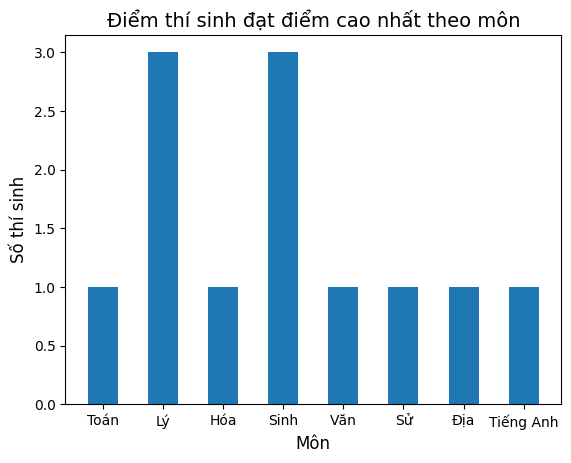

In [306]:
y=dicts.values()

plt.bar(x,y,width = 0.5)
plt.title('Điểm thí sinh đạt điểm cao nhất theo môn',fontsize = 14)
plt.xlabel('Môn',fontsize = 12)
plt.ylabel('Số thí sinh',fontsize = 12)
plt.show()

##### 6. Vẽ bđ điểm thấp nhất các môn

In [307]:
x = students.columns[5:]

dicts = {}

for mon in x:
    dicts[mon] = students[mon].min()
        
print(dicts)

{'Toán': 1.0, 'Lý': 2.0, 'Hóa': 3.0, 'Sinh': 2.0, 'Văn': 2.0, 'Sử': 2.0, 'Địa': 3.0, 'Tiếng Anh': 2.0}


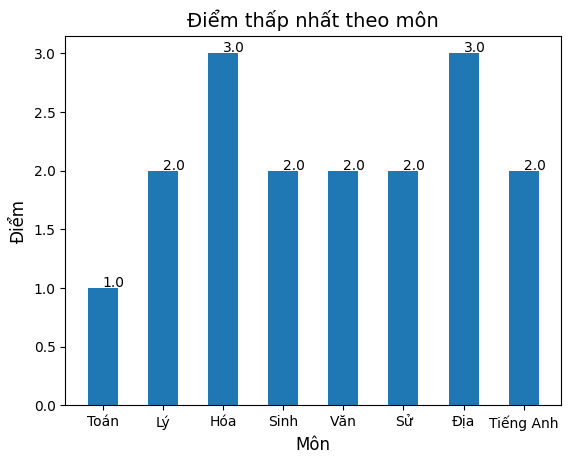

In [308]:
y=dicts.values()

plt.bar(x,y,width = 0.5)
plt.title('Điểm thấp nhất theo môn',fontsize = 14)
plt.xlabel('Môn',fontsize = 12)
plt.ylabel('Điểm',fontsize = 12)

for index, value in enumerate(y):
    plt.text(index, value+0.01,
             str(value))

plt.show()

##### 7. Vẽ biểu đồ phổ điểm của từng môn học

In [309]:
students['Toán']

0     7.0
1     5.6
2     4.2
3     8.0
4     9.3
5     5.6
6     6.7
7     7.5
8     7.0
9     8.2
10    6.5
11    7.3
12    2.5
13    3.7
14    9.0
15    8.5
16    4.5
17    6.5
18    7.2
19    3.2
20    1.0
Name: Toán, dtype: float64

Text(0, 0.5, 'Số thí sinh')

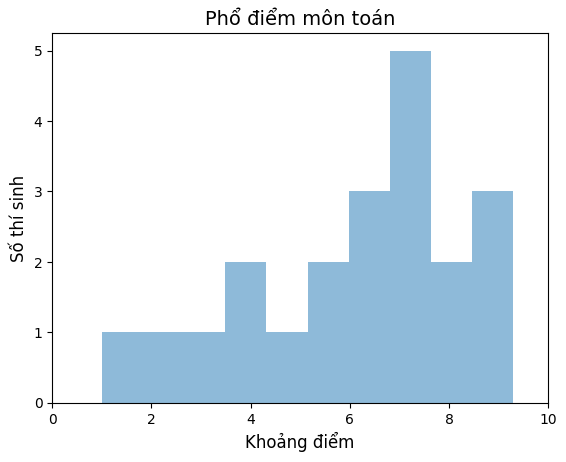

In [310]:
data = students['Toán']
plt.hist(data,bins=10, alpha=0.5,histtype='stepfilled')
plt.xlim(0,10,)
plt.title('Phổ điểm môn toán',fontsize = 14)
plt.xlabel('Khoảng điểm',fontsize = 12)
plt.ylabel('Số thí sinh',fontsize = 12)

##### 8. Phổ điểm tất cả các môn

##### 9.Số lượng thí sinh đổ vào twngfg khối

In [311]:
students["Điểm khối A"] = students["Toán"]+students["Lý"]+students["Hóa"]
students["Điểm khối A1"] = students["Toán"]+students["Lý"]+students["Tiếng Anh"]
students["Điểm khối B"] = students["Toán"]+students["Hóa"]+students["Sinh"]
students["Điểm khối C"] = students["Văn"]+students["Sử"]+students["Địa"]
students["Điểm khối D"] = students["Toán"]+students["Văn"]+students["Tiếng Anh"]*2


In [312]:
A = 23.5
A1 = 22
B = 21.5
C = 22.5
D = 27.7
students["A"] = students["Điểm khối A"]>=A
students["A1"] = students["Điểm khối A1"]>=A1
students["B"] = students["Điểm khối B"]>=B
students["C"] = students["Điểm khối C"]>=C
students["D"] = students["Điểm khối D"]>=D
students.head()

,Mã học sinh,Họ tên,Ngày sinh,Giới tính,Quê quán,Toán,Lý,Hóa,Sinh,Văn,...,Điểm khối A,Điểm khối A1,Điểm khối B,Điểm khối C,Điểm khối D,A,A1,B,C,D
0,20205210,Nguyễn Đức Bình,3/10/2000,Nam,Hà Nội,7.0,8.0,8.8,6.8,4.0,...,23.8,23.5,22.6,15.0,28.0,True,True,True,False,True
1,20205211,Lê Minh Hoàng,2/11/2001,Nam,Quảng Bình,5.6,7.7,6.0,7.0,6.5,...,19.3,22.3,18.6,15.9,30.1,False,True,False,False,True
2,20205212,Trần Trang Nhung,7/5/2002,Nữ,Hà Nam,4.2,6.5,5.4,8.0,7.0,...,16.1,16.2,17.6,18.8,22.2,False,False,False,False,False
3,20205213,Nguyễn Thị Linh,12/17/2000,Nữ,Bắc Ninh,8.0,5.6,6.5,7.0,7.5,...,20.1,19.6,21.5,19.6,27.5,False,False,True,False,False
4,20205214,Đặng Ngọc Sơn,1/25/2000,Nam,Thái Bình,9.3,5.8,7.5,4.5,6.5,...,22.6,18.9,21.3,18.8,23.4,False,False,False,False,False


In [313]:
x = students.columns[18:]
dicts = {}

for khoi in x:
    dicts[khoi] = students[khoi].sum()
        
print(dicts)

{'A': 4, 'A1': 5, 'B': 5, 'C': 4, 'D': 7}


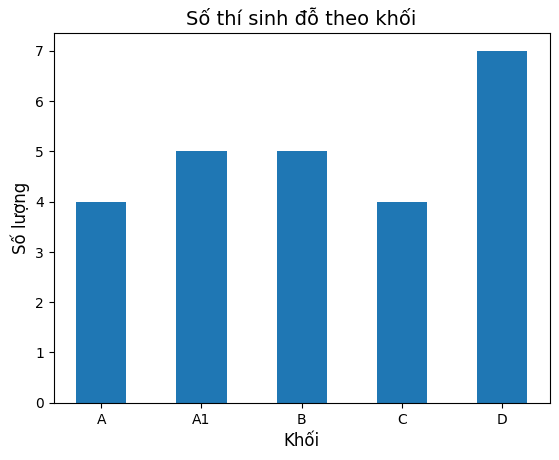

In [314]:
y=dicts.values()

plt.bar(x,y,width = 0.5)
plt.title('Số thí sinh đỗ theo khối',fontsize = 14)
plt.xlabel('Khối',fontsize = 12)
plt.ylabel('Số lượng',fontsize = 12)
plt.show()

##### 11. So sánh tỉ lệ đậu các khối

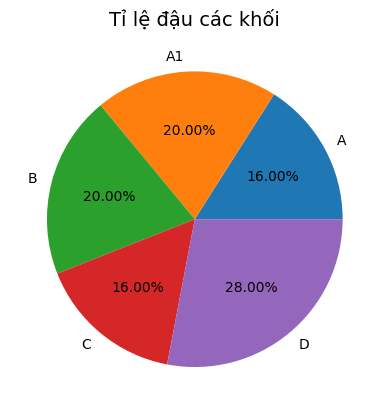

In [317]:
labels = students.columns[18:]

plt.pie(y,labels=labels,autopct='%1.2f%%')
plt.title('Tỉ lệ đậu các khối',fontsize = 14)
plt.show()

Text(0, 0.5, 'Lý')

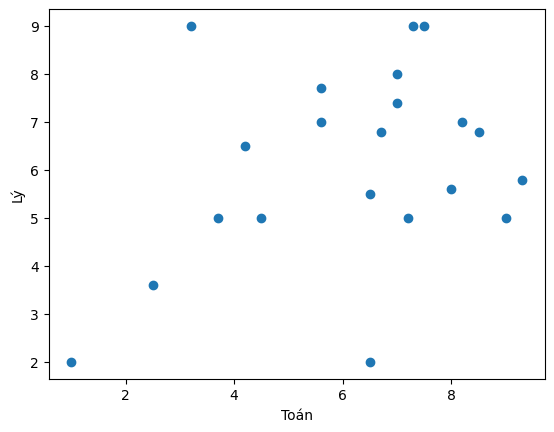

In [320]:
plt.scatter(students['Toán'],students['Lý'])
plt.xlabel('Toán')
plt.ylabel('Lý')